Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = "Just ME :)"

In [3]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import root_scalar

from  rootfinding_optimization_schemes import newton, bisection, secant

%matplotlib inline

# HW 2:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration. How many iterations are required to reduce the relative error to machine precision (if it converges)?

**Remember**: if you want to write $g^\prime$, remember to use `g^\prime` rather than `g'` in $\LaTeX$

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [4]:
def fixed_point(g, x0, N=5):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial iterate
        - *N* (int) - number of terms in iteration
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
    """

    # initial values
    x = numpy.empty(N+1)
    x[0] = x0
    
    for i in range(1, N+1):
        x[i] = g(x[i-1])
                 
    return x       

In [5]:
# Testing Cell

N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979, 0.79348036, 0.70136877])

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
print('success: passed N=5 test')

x_true = 0.7390851332153119
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success: passed N=1000 test')

success: passed N=5 test
success: passed N=1000 test


In [6]:
def get_relative_error(true, approx):
    return numpy.abs(true - approx) / numpy.abs(true)

In [7]:
def get_log_relative_error(M, x0, g, true_val, N=1000):
    
    # apprxomiate root of g
    x = fixed_point(g, x0, N=N)
    
    # compute log relative error
    true_array = numpy.full(x.shape, true_val)
    relative_error = get_relative_error(true_array, x)
    log_relative_error = numpy.log(relative_error)
    
    return log_relative_error

In [26]:
def plot_relative_error(log_relative_error, machine_eps, eqn_str):
#     """"
#     Please note: in question 1, there was some ambiguity in how we
#     count the number of iterations until we are less than machine 
#     epsilon. I assumed that 1) we include the initial point as an 
#     iteration and 2) we count the number of iterations it takes for
#     exceed machine epsilon, including the iteration that exceeds 
#     machine epsilon.
#     """

    # a the first location where log_relative_error is less than machine epsilon
    a = numpy.where(log_relative_error < numpy.log(machine_eps))
    converges = len(a[0]) > 0
    
    if converges:
        stop_idx = a[0][0] + 1
        plt.plot(log_relative_error[:stop_idx], label='ln(relative error)')
        #plt.plot(stop_idx-1, numpy.log(machine_eps), 'o', label='error < ε_machine')
        title = 'Relative Error of {} Converges\nAfter {} iterations, relative_error < ε_machine\nM={}, x0={}'.format(eqn_str, stop_idx-1, M, x0)
    else:
        plt.plot(log_relative_error, label='ln(relative error)')
        title = 'Relative Error of {} Diverges\n relative_error < ε_machine Never Occurs\nM={}, x0={}'.format(eqn_str, M, x0)
            
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Log of Relative Error')
    plt.legend()
    plt.show()

**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

This function is a fixed point function because
$$
\begin{align*}
    g(\sqrt{M})
    &=
    1 + \sqrt{M} - \frac{(\sqrt{M})^2}{M}
    =
    1 + \sqrt{M} - 1
    = \sqrt{M}
\end{align*}
$$
Let's explore its behvaior close to the fixed point:

$$
\begin{align*}
    g'(x)
    &=
    1 - \frac{2x}{M} \\
    |g'(\sqrt{M})| &= |1 - \frac{2 \sqrt{M}}{M}|
    = |1 - \frac{2}{\sqrt{M}}| < 1
    \Rightarrow M > 1
    \\
\end{align*}
$$
This means that if $ M > 1 $, our fixed point iteration will converge because then $|g'(x)| \leq 1$ when x is our fixed point. So because we have $M=3$, this will converge.

<ipython-input-7-7b81b6dec415>:9: RuntimeWarning: divide by zero encountered in log
  log_relative_error = numpy.log(relative_error)


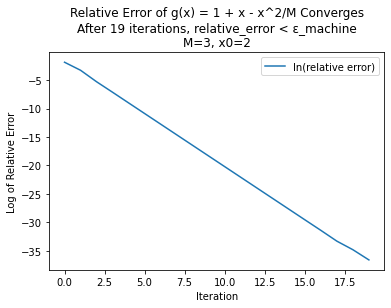

In [27]:
# initial values
M = 3
x0 = 2
g = lambda x: 1 + x - x**2/M
N = 1000
true_val = numpy.sqrt(3)
machine_eps = numpy.finfo(float).eps
eqn_str = 'g(x) = 1 + x - x^2/M'

# get log relative error
log_relative_error = get_log_relative_error(M, x0, g, true_val, N=N)
plot_relative_error(log_relative_error, machine_eps, eqn_str)

 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$

This function is a fixed point function because
$$
\begin{align*}
    g( \sqrt{M} ) 
    &=
    \frac{M}{\sqrt{M}}
    = \sqrt{M} \\
\end{align*}
$$

Let's explore its behvaior close to the fixed point:
$$
\begin{align*}
    g'(x)
    &=
    \frac{-M}{x^2} \\
    |g'(\sqrt{M})| &= |\frac{-M}{\sqrt{M}^2}| = |-1| = 1 \nless 1
    \\
\end{align*}
$$
This means that there is no value of $M$ for which our fixed point iteration will converge.

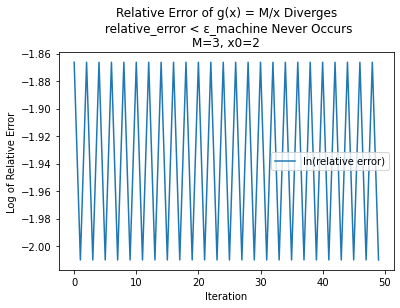

In [28]:
# initial values
M = 3
x0 = 2
g = lambda x: M/x
N = 1000
true_val = numpy.sqrt(3)
machine_eps = numpy.finfo(float).eps
eqn_str = 'g(x) = M/x'

# get log relative error
cutoff_idx = 50
log_relative_error = get_log_relative_error(M, x0, g, true_val, N=N)
plot_relative_error(log_relative_error[:cutoff_idx], machine_eps, eqn_str)

**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f^\prime}$$

with $$ f = x^2 - M$$

This function is a fixed point function because
$$
\begin{align*}
    g(x)
    &=
    x - \frac{x^2 - M}{2x} \\
    g(\sqrt{M})
    &=
    \sqrt{M} - \frac{\sqrt{M}^2 - M}{2 \sqrt{M}}
    = \sqrt{M} - 0
    = \sqrt{M}
\end{align*}
$$

Let's explore its behvaior close to the fixed point:
$$
\begin{align*}
    g'(x) &= \frac{1}{2} - \frac{M}{2x^2} \\
    g'(\sqrt{M}) &= \frac{1}{2} - \frac{M}{2 \sqrt{M}^2} = \frac{1}{2} - \frac{1}{2} = 0 \\
    \\
    g''(x) &= \frac{M}{x^3} \\
    |g''(\sqrt{M})| &= |\frac{M}{\sqrt{M}^3}| = |\frac{1}{\sqrt{M}}| < 1
    \Rightarrow M > 1 \\
\end{align*}
$$
This guarantees that our Newton's method will converge.

<ipython-input-7-7b81b6dec415>:9: RuntimeWarning: divide by zero encountered in log
  log_relative_error = numpy.log(relative_error)


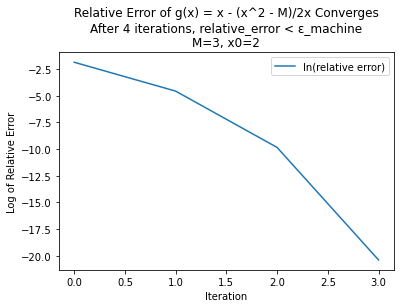

In [29]:
# initial values
M = 3
x0 = 2
g = lambda x: x - (x**2 - M) / (2*x)
N = 1000
true_val = numpy.sqrt(3)
machine_eps = numpy.finfo(float).eps
eqn_str = 'g(x) = x - (x^2 - M)/2x'

# get log relative error
log_relative_error = get_log_relative_error(M, x0, g, true_val, N=N)
plot_relative_error(log_relative_error, machine_eps, eqn_str)

## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use any or all  of the routines presented in class which have been included in an auxiliary python file `rootfinding_optimization_schemes.py`


You need to have this file in the same directory with your homework for this notebook to import it.

In [12]:
#  Cell to import and test at least newton's method from class

from rootfinding_optimization_schemes import newton

# set test function and its derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

functions loaded correctly


Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.05$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles.  You can plot all three curves on the same plot

In [13]:
def N(alpha, beta, A, x):
    return A * (numpy.sin(alpha * x) + numpy.sin(beta * x))

In [14]:
def f(alpha, beta, A, x):
    return numpy.cos(x) + N(alpha, beta, A, x)

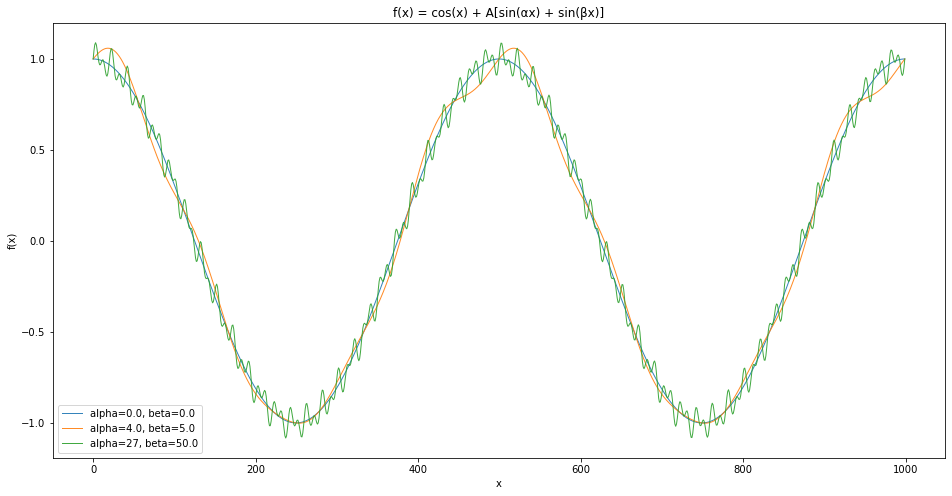

In [15]:
# initial values
x = numpy.linspace(-2 * numpy.pi, 2 * numpy.pi, num=1000)
alphas = [0., 4., 27]
betas = [0., 5., 50.]
A = 0.05
lines = []
plt.figure(figsize=(16,8))

for alpha, beta in zip(alphas, betas):
    lines.append(f(alpha, beta, A, x))
    
for line, alpha, beta in zip(lines, alphas, betas):
    label = 'alpha={}, beta={}'.format(alpha, beta)
    plt.plot(line, '-', linewidth=1, label=label, alpha=0.9)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = cos(x) + A[sin(αx) + sin(βx)]')
plt.legend()
plt.show()

**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* brentq method using scipy.optimize.root_scalar
* **EXTRA CREDIT** any other method used in root_scalar

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.2$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

In [16]:
a = 0.2 # left bracket
b = 2 # right bracket
c = 1.1 # midpoint
A = 0.05
params = [ (0., 0.), (4., 5.),  (27, 50.) ]

In [17]:
print('Bisection')
for alpha, beta in params:

    def f(x):
        return numpy.cos(x) + A * (numpy.sin(alpha * x) + numpy.sin(beta * x))

    x_star, x_array = bisection(f,a,b)
    print('α={}, β={}\tx*={}\tf(x*)={}\t{} Iterations'.format(alpha, beta, x_star, f(x_star), len(x_array)))

Bisection
α=0.0, β=0.0	x*=1.570796775817871	f(x*)=-4.490229742968679e-07	20 Iterations
α=4.0, β=5.0	x*=1.6304405212402344	f(x*)=1.9620940002601506e-07	18 Iterations
α=27, β=50.0	x*=1.5567201137542725	f(x*)=-3.49143903736332e-08	22 Iterations


In [18]:
print('Newton (Note =: I made the midpoint of the bracket my starting point)')
for alpha, beta in params:

    def f(x):
        return numpy.cos(x) + A * (numpy.sin(alpha * x) + numpy.sin(beta * x))
    def f_prime(x):
        return -numpy.sin(x) + A * (alpha * numpy.cos(alpha * x) + beta * numpy.cos(beta * x))

    x_star, x_array = newton(f, f_prime, c)
    print('α={}, β={}\tx*={}\tf(x*)={}\t{} Iterations'.format(alpha, beta, x_star, f(x_star), len(x_array)))

Newton (Note =: I made the midpoint of the bracket my starting point)
α=0.0, β=0.0	x*=1.5707963267948988	f(x*)=-2.1592137092929455e-15	4 Iterations
α=4.0, β=5.0	x*=1.6304407448908182	f(x*)=-8.637944526324048e-12	5 Iterations
α=27, β=50.0	x*=29.79728521893855	f(x*)=-2.990030098515284e-10	40 Iterations


In [19]:
print('secant')
for alpha, beta in params:
    
    def f(x):
        return numpy.cos(x) + A * (numpy.sin(alpha * x) + numpy.sin(beta * x))
    
    x_star, x_array = secant(f, a, b)
    print('α={}, β={}\tx*={}\tf(x*)={}\t{} Iterations'.format(alpha, beta, x_star, f(x_star), len(x_array)))

secant
α=0.0, β=0.0	x*=1.5707963267998242	f(x*)=-4.927552640156338e-12	6 Iterations
α=4.0, β=5.0	x*=1.6304406749277849	f(x*)=6.13728728740548e-08	7 Iterations
α=27, β=50.0	x*=1.5567201023472799	f(x*)=3.9454700583030355e-09	9 Iterations


In [20]:
print('brentq')
for alpha, beta in params:
    
    def f(x):
        return numpy.cos(x) + A * (numpy.sin(alpha * x) + numpy.sin(beta * x))
    
    result = root_scalar(f, method='brentq', bracket=(a,b))
    x_star = result.root
    iterations = result.iterations
    print('α={}, β={}\tx*={}\tf(x*)={}\t{} Iterations'.format(alpha, beta, x_star, f(x_star), iterations))    

brentq
α=0.0, β=0.0	x*=1.5707963267948966	f(x*)=6.123233995736766e-17	7 Iterations
α=4.0, β=5.0	x*=1.630440744880973	f(x*)=-2.983724378680108e-16	8 Iterations
α=27, β=50.0	x*=1.5567201035054403	f(x*)=-3.139849491518021e-16	10 Iterations


In [21]:
print('ridder')
for alpha, beta in params:
    
    def f(x):
        return numpy.cos(x) + A * (numpy.sin(alpha * x) + numpy.sin(beta * x))
    
    result = root_scalar(f, method='ridder', bracket=(a,b))
    x_star = result.root
    iterations = result.iterations
    print('α={}, β={}\tx*={}\tf(x*)={}\t{} Iterations'.format(alpha, beta, x_star, f(x_star), iterations))    

ridder
α=0.0, β=0.0	x*=1.5707963267945357	f(x*)=3.6088371534313326e-13	6 Iterations
α=4.0, β=5.0	x*=1.630440744881973	f(x*)=-8.77721506586937e-13	7 Iterations
α=27, β=50.0	x*=1.5567201035044596	f(x*)=3.3408605742968334e-12	6 Iterations


**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.2$.

Newton
α=0.0, β=0.0	x*=4.71238898038469	f(x*)=-1.8369701987210297e-16	5 Iterations
α=4.0, β=5.0	x*=-14.096326236971352	f(x*)=6.931560738582254e-08	5 Iterations
α=27, β=50.0	x*=1.556720103515459	f(x*)=-3.413055948975341e-11	138 Iterations


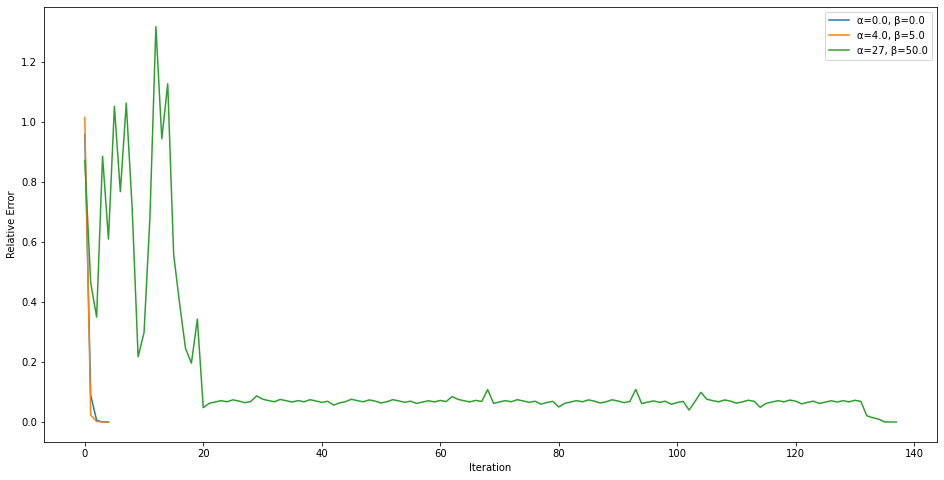

In [22]:
# initial values
print('Newton')
A = 0.05
params = [ (0., 0.), (4., 5.),  (27, 50.) ]
c = 0.2
plt.figure(figsize=(16,8))

for alpha, beta in params:

    # define functions
    def f(x):
        return numpy.cos(x) + A * (numpy.sin(alpha * x) + numpy.sin(beta * x))
    def f_prime(x):
        return -numpy.sin(x) + A * (alpha * numpy.cos(alpha * x) + beta * numpy.cos(beta * x))

    # Newton's method
    x_star, x_array = newton(f, f_prime, c)
    print('α={}, β={}\tx*={}\tf(x*)={}\t{} Iterations'.format(alpha, beta, x_star, f(x_star), len(x_array)))
    
    relative_errors = [get_relative_error(x_star, x) for x in x_array]
    label = 'α={}, β={}'.format(alpha, beta)
    plt.plot(relative_errors, label=label)

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Relative Error')
plt.show()

**(d)** [4] Briefly explain your results so far for all the methods.  Feel free to play with other initial parameters or to make additional plots.  

We explored each method -- bisection, newton, secant, brentq, ridder -- with little noise ($α=0.0, β=0.0$), a medium amount of noise ($α=4.0, β=5.0$), and a lot of noise ($α=27, β=50.0$). 

**Bisection** For no noise, medium noise, and high noise, it took bisection 20, 18, and 22 iterations respectively to converge. Bisection converges linearly so it makes sense that it takes a decent amount of iterations to converge. Because it took roughly the same amount of iterations to converge regardless of the noise, it seems that bisection method is not really affected by noise.

**Netwon's method** For no noise, medium noise, and high noise, it took Newton 4, 5, and 40 iterations respectively to converge (starting point $x_0 = 1.1$). Newton's method converges quadratically so it makes sense that it took very few iterations for it to converge when there is little noise. Because it took roughly 8 times as long to converge when there was a lot of noise, it seems that Netwon's method is greatly impacted by noise.

**Secant method** For no noise, medium noise, and high noise, it took the secant method 6, 7, and 9 iterations respectively to converge. The secant method converges superlinearly so it makes sense that it is faster than the bisection method (linear) but slower than Newton's method (quadratic). Because it took roughly the same amount of iterations to converge regardless of the noise, it seems that secant method is not really affected by noise.

**Brentq** For no noise, medium noise, and high noise, it took brentq 7, 8, and 10 iterations respectively to converge. Brent’s method is a combination of bisection (linear convergence), secant (superlinear convergence) and inverse quadratic interpolation. Therefore it makes sense that brentq is slightly slower than secant. Moreover, because it took roughly the same amount of iterations to converge regardless of the noise, it seems that brentq is not really affected by noise.

**Ridder's Method** For no noise, medium noise, and high noise, it took Ridder's method 6, 7, and 6 iterations respectively to converge. Ridder's method converges quadratically but as oppossed to Newton's method it requires two evaluations, making it slightly slower. This is reflected in that it takes slightly longer to converge than Newton's method when there is little noise. Because it took roughly the same amount of iterations to converge regardless of the noise, it seems that Ridder's method is not really affected by noise.

For no noise, medium noise, and high noise, it took Newton's method 5, 5, and 138 iterations iterations respectively to converge given the starting point is $x_0 = 0.2$. It takes Newton's method so few iterations to converge when there is little noise because Newton's method converges quadratically. However, the graph above illustrates how Newton's method is sensitive to noise and can often find itself jumping around from one point to another close to the root but without actually hitting the root. This is likely impaced by the poor initial estimate: the root is $x^* = 1.5567$ but our starting point was $x_0 = 0.2$.

**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

`x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)`

In [23]:
def newtsafe(f,f_prime,a,b,tol = 1.e-6, max_steps=1000):
    """
    
    Newtsafe is a bracketed root finding method. It tries Newton's
    method from the midpoint of the bracket. If Newton predicts 
    a solution outside of the bracket, ignore it and take a bisection
    step instead.
        
    
    Parameters:
    -----------
    
    f: function (float)
        function returning f(x)
    f_prime:  function (float)
        function returning derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f(x)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """
        
    # initial values
    MAX_STEPS = max_steps
    n_newt = 0
    n_bisection = 0
    
    delta_x = b - a
    c = a + delta_x / 2.0
    f_c = f(c)
    f_a = f(a)
    f_b = f(b)
        
    # check initial bracket
    if a > b or numpy.sign(f_a) == numpy.sign(f_b):
        raise ValueError('initial bracket is invalid')
    
    for step in range(1, MAX_STEPS + 1):
                
        # check for solution 
        if numpy.abs(f_c) < tol:
            break
        
        # perform Newton's method
        c_new = c - f_c / f_prime(c)
                
        # if Newton's method is inside the bracket, 
        # then update according to Newton's method
        if a < c_new < b:
            
            n_newt += 1
            c = c_new
            f_c = f(c)
        
        # if Newton's method is outside the bracket, perform bisection
        else:
            
            n_bisection += 1
        
            # determine if the root is in the bracket [a,c] or [c,b]
            if numpy.sign(f_a) != numpy.sign(f_c):
                b = c
                f_b = f_c
            else:
                a = c
                f_a = f_c

            # update the value of c and f_c
            delta_x = b - a
            c = a + delta_x / 2.0
            f_c = f(c)
            
    # check not to exceed max_steps
    if step == MAX_STEPS:
        warnings.warn('Maximum number of steps exceeded')
        
    return c, n_newt, n_bisection

In [24]:
# Testing Cell
from  rootfinding_optimization_schemes import newton
from scipy.optimize import root_scalar

a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.cos(a * x) + b*numpy.cos(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    sol = root_scalar(f, bracket=(a, b),method='brentq')
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(sol.root, sol.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, sol.root,decimal=5)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


Bracket  = [-0.68309670780092, 2.642524050776319]
Newton   = 1.27194847295657,    N   = 3
NewtSafe = 1.27194847295657,    N_n = 3, N_b = 0
brentq   = 1.2719484732512498,    N   = 9

Bracket  = [-0.7104536143852529, 3.8152626763086603]
Newton   = -23.8662065317763,    N   = 7
NewtSafe = 1.0884990113244402,    N_n = 3, N_b = 2
brentq   = 1.088499013515958,    N   = 13

Bracket  = [-0.5236057894835726, 3.9067882124238986]
Newton   = -10.863477689404652,    N   = 11
NewtSafe = 1.1106142646362411,    N_n = 5, N_b = 1
brentq   = 1.1106142646873127,    N   = 11

Bracket  = [-0.5275356434135271, 2.4988039593212776]
Newton   = 1.3248590962279085,    N   = 3
NewtSafe = 1.3248590962279085,    N_n = 3, N_b = 0
brentq   = 1.3248590968150393,    N   = 9

Bracket  = [-0.3534683303763972, 3.9130408021252014]
Newton   = 1.1473182519095415,    N   = 10
NewtSafe = 1.1473181573836526,    N_n = 6, N_b = 1
brentq   = 1.1473182519138232,    N   = 9

initial bracket is invalid
success!


## Question 3 - Solve a "real" rootfinding problem

In Homework 2, I asked you to *estimate* the number of terms in the taylor expansion of $e^x$ such that the relative error was less than $\epsilon_{mach}$.  This was essentially a non-linear problem in the number of steps $n$.  Here we will use a rootfinder to get this number more precisely.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 0.1, 1., 10. ,100. , 709., 1000. and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


Based on the sample x values given to us above, I am assuming that $x>0$.
$$
\begin{align*}
    r 
    &= 
    \epsilon_{mach}
    \\
    \left| \frac{x^{n+1}}{(n + 1)!} \right|
    &=
    \epsilon_{mach} \\
     \frac{x^{n+1}}{(n + 1)!}
     &=
    \epsilon_{mach} \\
    ln \bigg( \frac{x^{n+1}}{(n + 1)!} \bigg)
    &=
    ln ( \epsilon_{mach} )\\
    (n+1) ln(x) - (n+1) ln(n+1) + (n+1)
    =
    ln ( \epsilon_{mach} )\\
    f(n) =
    (n+1) \big( ln(x) - ln(n+1) + 1 \big)
    - ln ( \epsilon_{mach} )
    =
    0 \\
\end{align*}
$$

In [25]:
# initial values
machine_eps = numpy.finfo(float).eps
x_array = [0.1, 1, 10, 100, 709, 1000]

for x in x_array:
    approx = numpy.exp(1) * x
    a = approx # bracket lower bound
    b = 300 * a # brackt upper bound

    # define the function we want to find the root of
    f = lambda n: (n + 1) * (numpy.log(x) - numpy.log(n + 1) + 1) - numpy.log(machine_eps)

    # use scipy solve to get root of f
    result = root_scalar(f, method='brentq', bracket=(a,b))
    n_star = result.root
    iterations = result.iterations

    relative_error = get_relative_error(n_star, approx)
    print('x={}\trelative_error={}'.format(x, relative_error))
    print('FLOAT:  n*={}\tn_approx={}'.format(n_star, approx))
    print('INT:    n*={}\t\tn_approx={}\n'.format(numpy.ceil(n_star), numpy.ceil(approx)))

x=0.1	relative_error=0.9697910021988252
FLOAT:  n*=8.998252263613129	n_approx=0.27182818284590454
INT:    n*=9.0		n_approx=1.0

x=1	relative_error=0.846366254674098
FLOAT:  n*=17.69326017986983	n_approx=2.718281828459045
INT:    n*=18.0		n_approx=3.0

x=10	relative_error=0.4811647423145021
FLOAT:  n*=52.39200282157356	n_approx=27.18281828459045
INT:    n*=53.0		n_approx=28.0

x=100	relative_error=0.10825980998184637
FLOAT:  n*=304.82890183560164	n_approx=271.8281828459045
INT:    n*=305.0		n_approx=272.0

x=709	relative_error=0.017693767588901572
FLOAT:  n*=1961.9765738907554	n_approx=1927.261816377463
INT:    n*=1962.0		n_approx=1928.0

x=1000	relative_error=0.012643543579275062
FLOAT:  n*=2753.0906500709116	n_approx=2718.2818284590453
INT:    n*=2754.0		n_approx=2719.0

